In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [3]:
walmart_dataset = pd.read_csv(r"C:\Users\Diksha\Downloads\Walmart_Store_sales(3).csv")

In [4]:
walmart_dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
walmart_dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
walmart_dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
weekly_max_sale = (walmart_dataset['Weekly_Sales']).max()
print(weekly_max_sale)

3818686.45


In [8]:
walmart_data_groupby = walmart_dataset.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has maximum Sales. Sum of Total Sales {}".format(walmart_data_groupby.idxmax
(),walmart_data_groupby.max()))

Store Number 20 has maximum Sales. Sum of Total Sales 301397792.46000004


In [9]:
walmart_data_std = walmart_dataset.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store Number {} has maximum Standard Deviation. STD {}".format(walmart_data_std['Weekly_Sales'
].idxmax(),walmart_data_std['Weekly_Sales'].max()))

Store Number 14 has maximum Standard Deviation. STD 317569.9494755081


In [10]:
walmart_data_Q32012 = walmart_dataset[(pd.to_datetime(walmart_dataset['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(walmart_dataset['Date']) <= pd.to_datetime('09-30-2012'))]
walmart_data_growth = walmart_data_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012 {}".format(walmart_data_growth.idxmax(),walmart_data_growth.max()))

Store Number 4 has Good Quartely Growth in Q3'2012 25652119.35


In [11]:
# Stores Holiday Sales
stores_holiday_sales = walmart_dataset[walmart_dataset['Holiday_Flag'] == 1]

# Stores Weekday Sales
stores_nonholiday_sales = walmart_dataset[walmart_dataset['Holiday_Flag'] == 0]

#Stores Sales in Super Bowl Day 
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

stores_holiday_sales_superBowl = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-02-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-02-2011'))
                                                      |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-02-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('08-02-2013'))]

#Stores Sales in Labour Day 
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
stores_holiday_sales_labourDay = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-09-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('09-09-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('07-09-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('06-09-2013'))]

#Stores Sales in Thanks Giving 
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

stores_holiday_sales_thanksgiving = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('26-11-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('25-11-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('23-11-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('29-11-2013'))]

#Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

stores_holiday_sales_Christmas = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('31-12-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('30-12-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('28-12-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('27-12-2013'))]
stores_nonholiday_sales_mean = stores_nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()
stores_holiday_sales_sum = stores_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()
for row in stores_holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :-{}".format(row.Date,row.Weekly_Sales))
            break;

print("Super Bowl Day Sale",stores_holiday_sales_superBowl['Weekly_Sales'].sum())
print("Labour Day Sale",stores_holiday_sales_labourDay['Weekly_Sales'].sum())
print("Thanksgiving Day Sale",stores_holiday_sales_thanksgiving['Weekly_Sales'].sum())
print("Christmas Day Sale",stores_holiday_sales_Christmas['Weekly_Sales'].sum())



On this Date 07-09-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :-48330059.31
On this Date 09-09-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :-46763227.529999994
On this Date 10-02-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :-50009407.919999994
On this Date 10-09-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :-45634397.84
On this Date 11-02-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :-47336192.79000002
On this Date 12-02-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :-48336677.63000002
On this Date 25-11-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :-66593605.25999998
On this Date 26-11-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :-65821003.23999999
On this Date 30-12-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :-46042461.04000001
On this Date 31-12-2010 Holiday Sales is greater than No

In [12]:
x_features_object = walmart_dataset[walmart_dataset['Store'] ==1][['Store','Date']]
date_obj = walmart_dataset[walmart_dataset['Store'] ==1][['Date']]
date_obj.index +=1
x_features_object.Date = date_obj.index
x_features_object.head()



,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [15]:
y_target = walmart_dataset[walmart_dataset['Store'] ==1]['Weekly_Sales']
y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [19]:
x_axis = x_features_object

In [20]:
y_axis = y_target

ConversionError: Failed to convert value(s) to axis units: array(['05-02-2010', '12-02-2010', '19-02-2010', ..., '12-10-2012',
       '19-10-2012', '26-10-2012'], dtype=object)

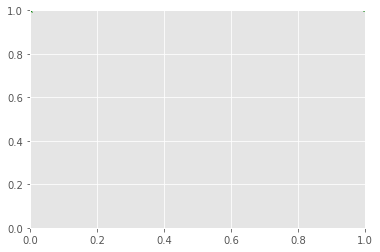

In [21]:
style.use('ggplot')
plt.plot(walmart_dataset,'g',label= 'Line one',linewidth = 1,marker= '2',linestyle = '--')

plt.xlabel('')
plt.ylabel('Y')
plt.title('Analysis')
plt.legend()
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_features_object,y_target,random_state=1)

In [83]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
feature_dataset = walmart_dataset[walmart_dataset['Store'] ==1][['Store','CPI','Unemployment','Fuel_Price'
]]
feature_dataset.head()



,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [84]:
response_set_cpi = walmart_dataset[walmart_dataset['Store'] ==1]['CPI'].astype('int64')
response_set_unemployment = walmart_dataset[walmart_dataset['Store'] ==1]['Unemployment'].astype('int64')


In [85]:
from sklearn.model_selection import train_test_split
x_train_cpi,x_test_cpi,y_train_cpi,y_test_cpi = train_test_split(feature_dataset,response_set_cpi,random_state=1)
x_train_unemp,x_test_unemp,y_train_unemp,y_test_unemp = train_test_split(feature_dataset,response_set_unemployment,random_state=1)



In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train_cpi,y_train_cpi)
y_pred = logreg.predict(x_test_cpi)
logreg.fit(x_train_unemp,y_train_unemp)
y_pred_unemp = logreg.predict(x_test_unemp)

In [87]:
from sklearn.metrics import accuracy_score
print("cpi Accuracy {:.2%}".format(accuracy_score(y_test_cpi,y_pred)))
print("unempployement Accuracy {:.2%}".format(accuracy_score(y_test_unemp,y_pred_unemp)))

cpi Accuracy 72.22%
unempployement Accuracy 94.44%


In [88]:
from sklearn.metrics import confusion_matrix,classification_report
print ("Confusion matrix")
print (confusion_matrix(y_test_cpi,y_pred))
print (confusion_matrix(y_test_unemp,y_pred_unemp))


Confusion matrix
[[ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6]]
[[ 1  0  0]
 [ 1 33  0]
 [ 0  1  0]]


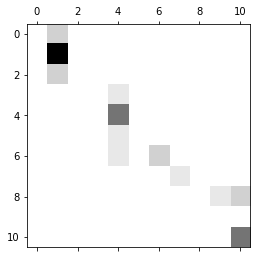

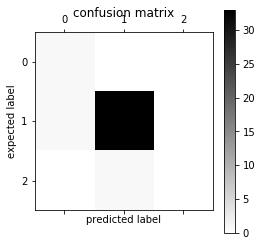

In [89]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(y_test_cpi,y_pred), cmap=plt.cm.binary, interpolation='nearest')
plt.matshow(confusion_matrix(y_test_unemp,y_pred_unemp), cmap=plt.cm.binary, interpolation='nearest')

plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [90]:
print('cpi actual :', y_test_cpi.values[0:30])
print('cpi Predicted :', y_pred[0:30])
print('actual Unemployment :', y_test_unemp.values[0:30])
print('Predicted Unemployment :', y_pred_unemp[0:30])

cpi actual : [215 221 211 211 221 211 210 211 215 217 221 212 216 218 211 210 211 217
 215 211 212 217 221 219 214 211 211 219 215 219]
cpi Predicted : [215 221 211 211 221 211 211 211 215 215 221 211 215 218 211 211 211 217
 215 211 211 217 221 221 215 211 211 221 215 220]
actual Unemployment : [7 7 7 8 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Predicted Unemployment : [7 7 7 7 6 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [91]:
#Change dates into days by creating new variable.

walmart_dataset['Day'] = pd.to_datetime(walmart_dataset['Date']).dt.day_name()
walmart_dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday
